In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [2]:
detector = dlib.get_frontal_face_detector()

if not Path("shape_predictor_68_face_landmarks.dat").is_file():
    !wget https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat

predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

Inference Time: 0.10699517499597277


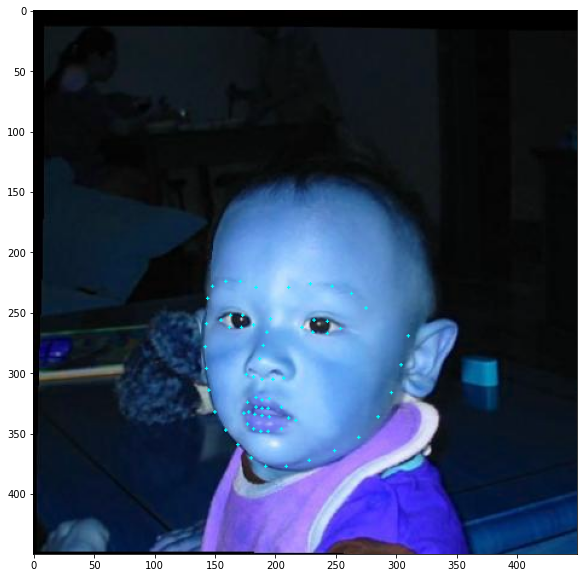

In [3]:
image = cv2.imread("data/300W_LP/AFW/AFW_1204062305_1_2.jpg")
# Convert the image color to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

start = time.perf_counter()
# Detect the face
rects = detector(gray, 1)
end = time.perf_counter()

# Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
    # Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    # shape = shape_np
    # end = time.perf_counter()

    # Display the landmarks
    for i, (x, y) in enumerate(shape_np):
        # Draw the circle to mark the keypoint 
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)

# Display the image
print(f"Inference Time: {end-start}")
plt.figure(figsize=(20,10))
plt.imshow(image)

In [4]:
x_min, x_max, y_min, y_max = shape_np[...,0].min(), shape_np[...,0].max(), shape_np[...,1].min(), shape_np[...,1].max()

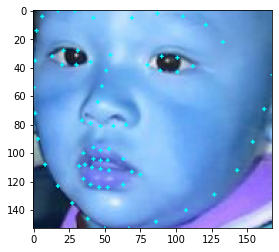

In [5]:
plt.imshow(image[y_min:y_max, x_min:x_max])

In [6]:
k = 0.20
x_min -= 2 * k * abs(x_max - x_min)
y_min -= 2 * k * abs(y_max - y_min)
x_max += 2 * k * abs(x_max - x_min)
y_max += 0.6 * k * abs(y_max - y_min)

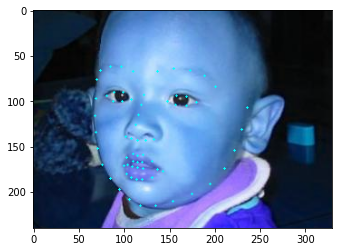

In [7]:
plt.imshow(image[int(y_min):int(y_max), int(x_min):int(x_max)])